In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the two images
img1 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_top.jpg')
img2 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_side.jpg')

In [2]:
img1.shape

(4624, 3468, 3)

In [3]:
img2.shape

(4624, 3468, 3)

In [4]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

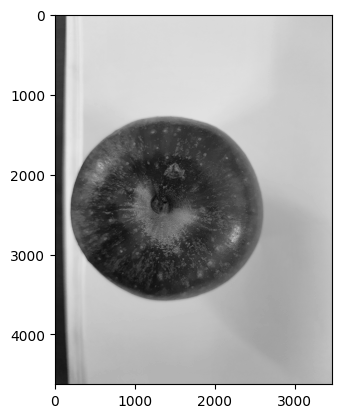

In [5]:
plt.imshow(gray_img1,'gray')

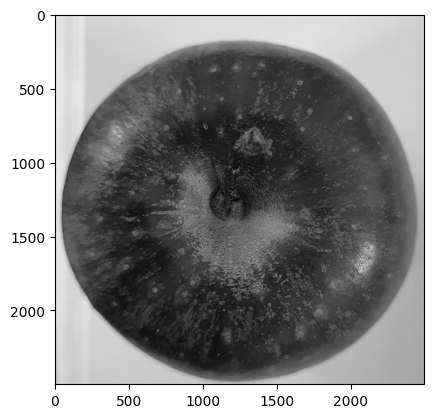

In [6]:
cropped_apple_top=gray_img1[1100:3600,150:2650]
plt.imshow(cropped_apple_top,'gray')

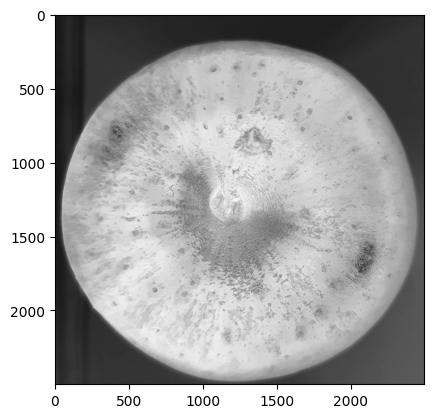

In [7]:
cropped_apple_top_inverted=cv2.bitwise_not(cropped_apple_top)
plt.imshow(cropped_apple_top_inverted,'gray')

In [8]:
cropped_apple_top.shape

(2500, 2500)

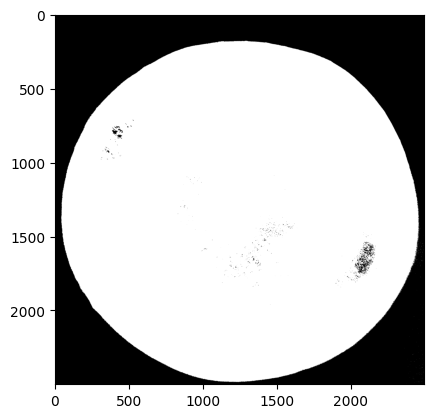

In [10]:
_, binary1 = cv2.threshold(cropped_apple_top_inverted, 100, 255, cv2.THRESH_BINARY)

# Display the result 
plt.imshow(binary1,'gray')

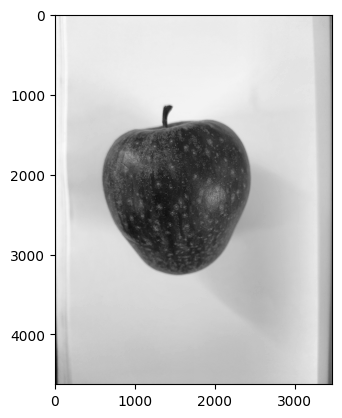

In [11]:
plt.imshow(gray_img2,'gray')

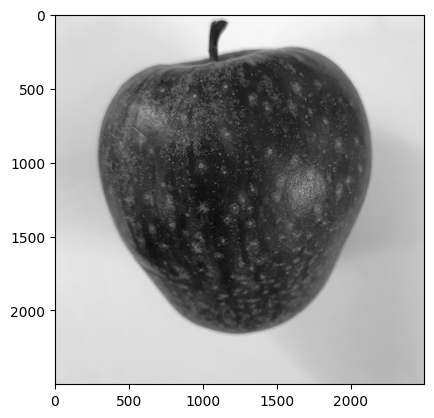

In [12]:
cropped_apple_side=gray_img2[1100:3600,300:2800]
plt.imshow(cropped_apple_side,'gray')

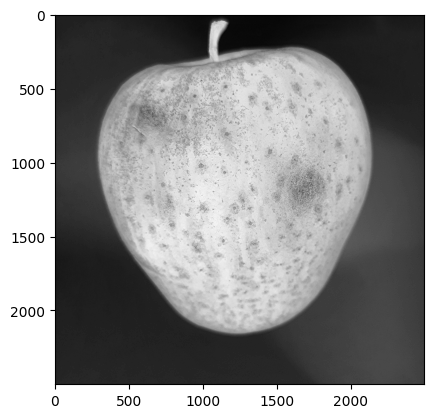

In [13]:
cropped_apple_side_inverted=cv2.bitwise_not(cropped_apple_side)
plt.imshow(cropped_apple_side_inverted,'gray')

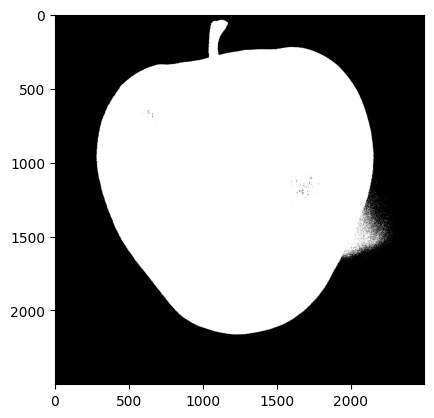

In [14]:
_, binary2 = cv2.threshold(cropped_apple_side_inverted, 100, 255, cv2.THRESH_BINARY)

# Display the result 
plt.imshow(binary2,'gray')

In [15]:
resized_apple_top = cv2.resize(binary1,(2500,2500))
resized_apple_side=cv2.resize(binary2,(2500,2500))


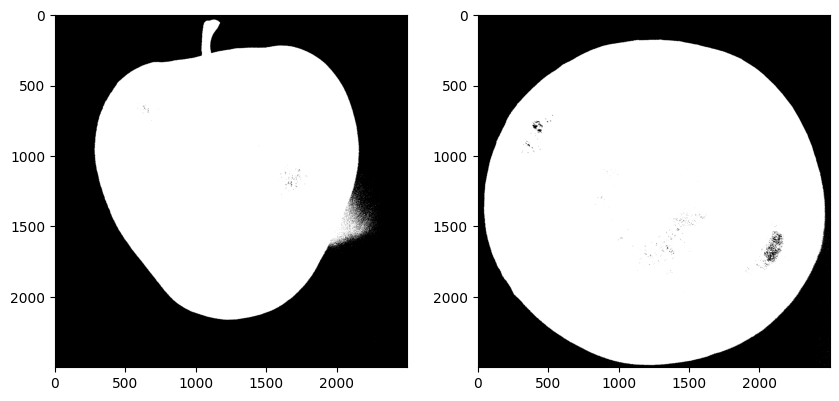

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(resized_apple_side, 'gray')

plt.subplot(1,2,2)
plt.imshow(resized_apple_top, 'gray')
plt.show()

In [17]:
white_pixels_top=np.where(resized_apple_top==255)

In [18]:
white_pixels_top

(array([ 181,  181,  181, ..., 2486, 2491, 2499], dtype=int64),
 array([1284, 1285, 1286, ..., 2461, 2429, 2373], dtype=int64))

In [19]:
white_pixels_side=np.where(resized_apple_side==255)

In [20]:
white_pixels_side

(array([  38,   38,   39, ..., 2356, 2359, 2419], dtype=int64),
 array([1124, 1125, 1121, ..., 2345, 2161, 2233], dtype=int64))

In [21]:
height, width = resized_apple_top.shape[:2]
print(height,width)

2500 2500


In [22]:
height, width = resized_apple_side.shape[:2]
print(height,width)

2500 2500


In [28]:
volume = 0
for y in range(height):
    for x in range(width):
        # Check if the pixel is white in both images
        if resized_apple_top[y,x] == 255 and resized_apple_side[y,x]==255:
            # Multiply the pixel values and add to the volume
            volume += resized_apple_top[y,x]*resized_apple_side[y,x]

print("Volume: ", volume/(50*50*50)*(2.54*2.54*2.54))

C:\Users\MANAV MAHENDRU\AppData\Local\Temp\ipykernel_12808\2206556932.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  volume += resized_apple_top[y,x]*resized_apple_side[y,x]


Volume:  372.34201763705596
